In [38]:
import pingparsing as pp
import json
import glob
from pathlib import Path
import requests
import ipinfo
import itertools
import operator
import pickle

In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
files = glob.glob("./RESULTS/*.txt")

In [41]:
def parse_results(file_paths):
    results = dict()
    parser = pp.PingParsing()
    for PATH in file_paths:
        url = Path(PATH).stem
        with open(PATH, "r") as f:
                content = f.read()
        if len(content) < 1:
            continue
        results[url] = {"info" : None, "replies" : None}
        _content = parser.parse(content)
        results[url]["info"] = _content.as_dict()
        results[url]["replies"] = _content.icmp_replies
        ip_start_index = content.find(' (') + 2
        ip_end_index = content.find(')')
        results[url]['ip'] = content[ip_start_index:ip_end_index]
    return results

In [52]:
results = parse_results(files)

In [66]:
def get_times(replies):
    times = []
    for rpl in replies:
        times.append(int(rpl['time']))
    return times

In [67]:
url_to_times = dict()

for url in results.keys():
    url_to_times[url] = get_times(results[url]['replies'])

In [68]:
def plot_each(url_time_dict):
    for url in url_time_dict.keys():
        times = np.array(list(itertools.accumulate(url_time_dict[url], operator.add))) / 1000. # secs.
        plt.figure(figsize=(17, 10))
        n = min(times.size, len(url_to_times[url]))
        plt.plot(times[:n], url_to_times[url][:n], marker='.', linewidth=0.1)
        plt.xlabel('Elapsed time [s]')
        plt.ylabel('Response time [ms]')
        plt.title("Response time evolution of : %s" % url)
        plt.savefig('%s-time_to_resp_time.png' % url[:-4], dpi=70)
        plt.show()

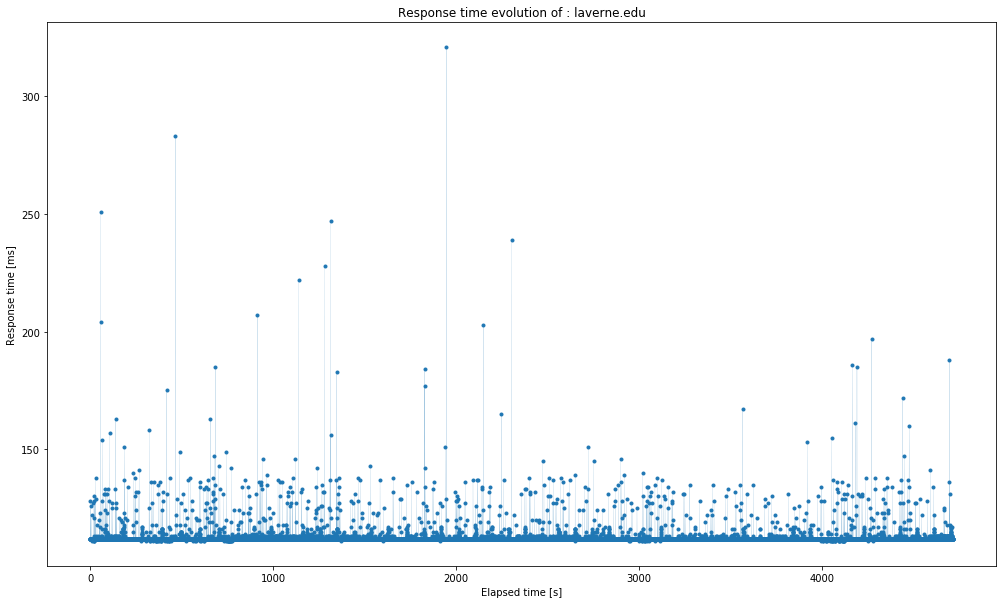

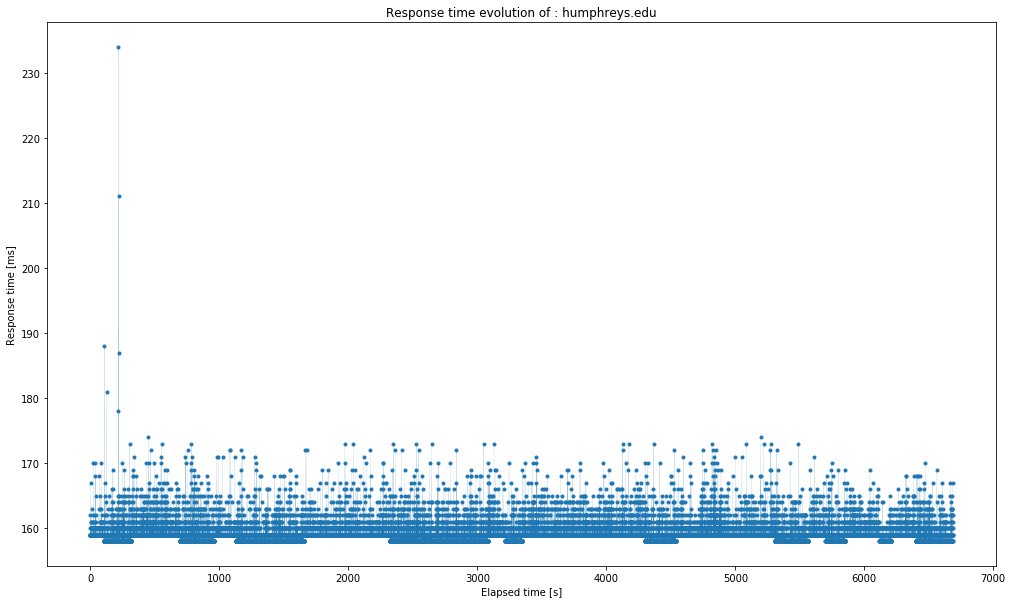

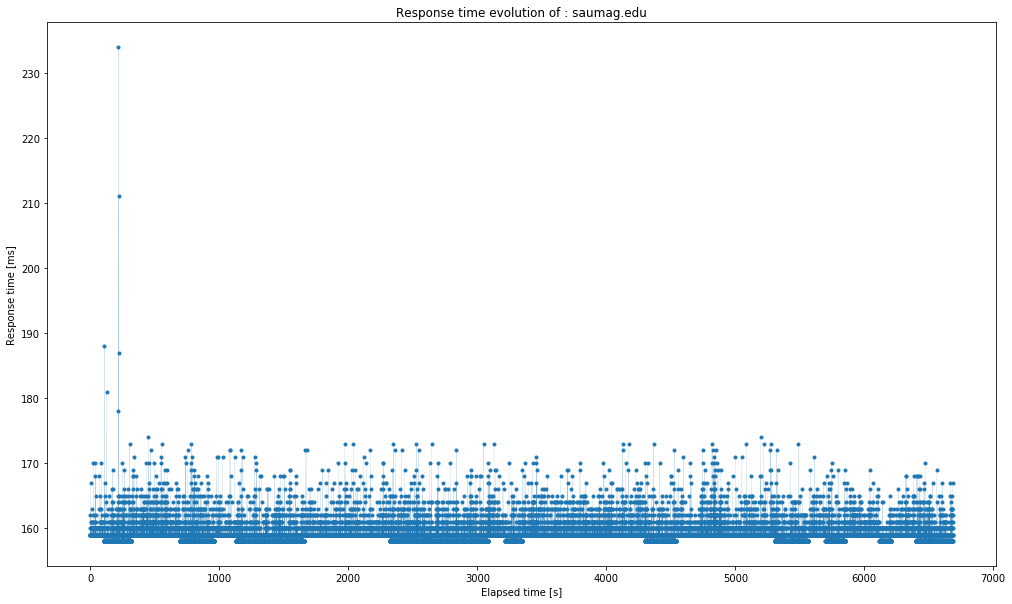

In [69]:
plot_each(url_to_times)